In [9]:
# 데이터 처리 및 분석
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import warnings

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 분석
from scipy import stats
from scipy.stats import shapiro, levene, ttest_ind, chi2_contingency, f_oneway
from scipy.stats import mannwhitneyu, fisher_exact, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import pingouin as pg
import scikit_posthocs as sp

# 출력 설정
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 한글 폰트 설정
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)

# 시드 설정
np.random.seed(42) # 팀원간의 결과물이 동일하게 보일 수 있음

print("="*60)
print("라이브러리 로드 완료!")
print("한글 폰트 설정 완료!")
print("="*60)

라이브러리 로드 완료!
한글 폰트 설정 완료!


In [10]:
import os
os.chdir(r"C:\Users\lizzy\OneDrive\바탕 화면\실전프로젝트\code\eda")  # 작업 디렉토리로 변경
print(os.getcwd())  # 잘 바뀌었는지 확인

C:\Users\lizzy\OneDrive\바탕 화면\실전프로젝트\code\eda


In [11]:
import pandas as pd

df_energy = pd.read_csv('에너지사용정보.csv', encoding='euc-kr')
df_growth = pd.read_csv('생육정보.csv', encoding='euc-kr')
df_environment = pd.read_csv('환경정보.csv', encoding='euc-kr')
df_produce = pd.read_csv('생산정보.csv', encoding='euc-kr')


In [15]:
df_energy.head

<bound method NDFrame.head of        measDate farm_cde  water_usage  water_cost  fertilizer_usage  \
0    2022-10-01     천지인술         1200         180              3632   
1    2022-10-02     천지인술           90          13               288   
2    2022-10-03     천지인술          440          66              1452   
3    2022-10-04     천지인술          600          90              1802   
4    2022-10-05     천지인술         1020         153              3064   
..          ...      ...          ...         ...               ...   
275  2022-12-05    토마토명가         1690         253              4966   
276  2022-12-06    토마토명가          650          97              1976   
277  2022-12-07    토마토명가         1040         156              3029   
278  2022-12-08    토마토명가         1950         292              5226   
279  2022-12-09    토마토명가          920         138              2121   

     fertilizer_cost  heating_energy_usage  heating_energy_cost  CO2_usage  \
0               4576                   

In [16]:
df_energy['farm_cde'].unique()

array(['천지인술', 'Trigger', '이삭줍는 알파고', '토마토명가'], dtype=object)

          water_cost  fertilizer_cost  heating_energy_cost  CO2_cost  \
farm_cde                                                               
Trigger        20571           410315               220825       776   
이삭줍는 알파고       13290           298740               192525      8694   
천지인술           14457           321023               167756         0   
토마토명가          17188           328524               132720     12447   

          mist_cost  
farm_cde             
Trigger       33676  
이삭줍는 알파고     259511  
천지인술          29799  
토마토명가         23678  


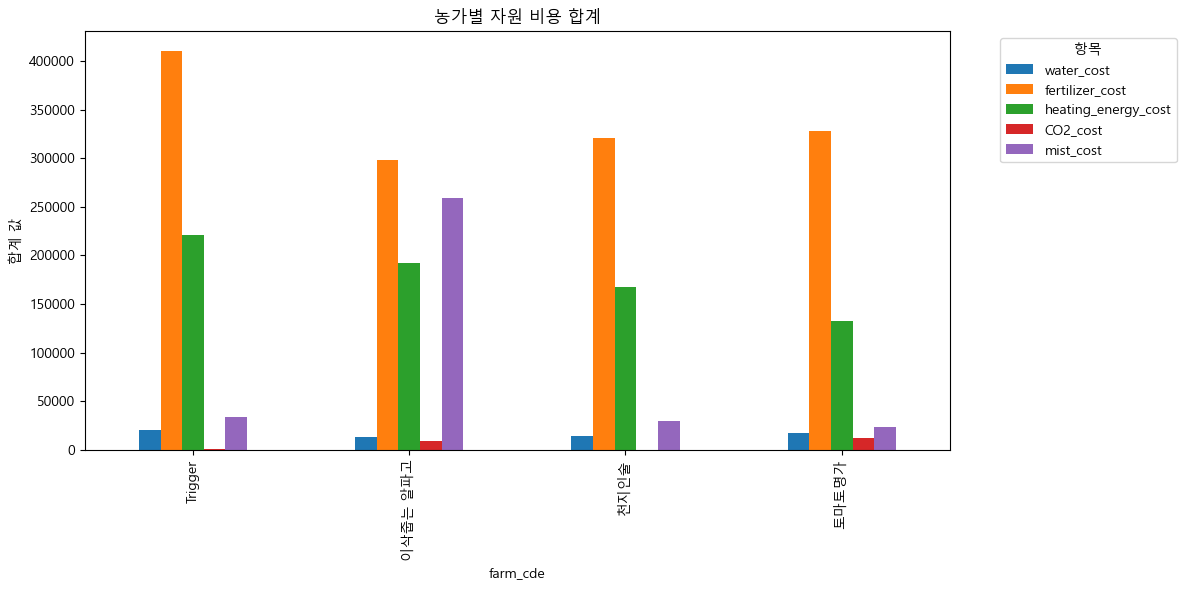

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


# 합계를 구할 컬럼 목록
cols = [
    "water_cost",
    "fertilizer_cost",
    "heating_energy_cost",
    "CO2_cost",
    "mist_cost"
]

# farm_cde별 합계 계산
df_sum = df_energy.groupby("farm_cde")[cols].sum()

print(df_sum)

# 막대 그래프 그리기
ax = df_sum.plot(kind="bar", figsize=(12,6))
plt.title("농가별 자원 비용 합계")
plt.xlabel("farm_cde")
plt.ylabel("합계 값")
plt.legend(title="항목", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


'이삭줍는 알파고'가 특이하게 mist 비용이 압도적으로 많다. ---> 왜지?
'Trigger'가 비료 비용, 열 에너지 사용 비용이 높다.

          water_usage  water_cost
farm_cde                         
Trigger        137260       20571
이삭줍는 알파고        88740       13290
천지인술            96490       14457
토마토명가          114690       17188


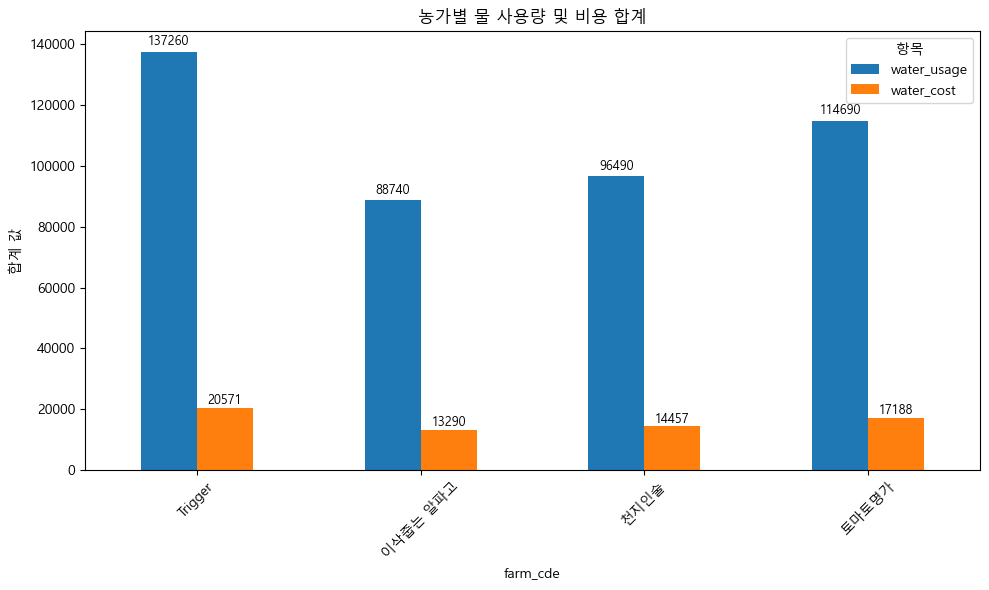

In [19]:


import pandas as pd
import matplotlib.pyplot as plt

# farm_cde별 water_usage, water_cost 합계 계산
df_1 = df_energy.groupby("farm_cde")[["water_usage", "water_cost"]].sum()

print(df_1)

# 막대 그래프 그리기
ax = df_1.plot(kind="bar", figsize=(10,6))
plt.title("농가별 물 사용량 및 비용 합계")
plt.xlabel("farm_cde")
plt.ylabel("합계 값")
plt.xticks(rotation=45)
plt.legend(title="항목")
plt.tight_layout()

# 각 막대 위에 수치 표시
for p in ax.patches:
    value = int(p.get_height())  # 막대 높이(값)
    x = p.get_x() + p.get_width() / 2  # 막대 중앙
    y = p.get_height()                 # 막대 높이
    ax.text(x, y + (y*0.01), str(value), ha="center", va="bottom", fontsize=9)

plt.show()



Trigger가 물사용량이 제일 많다!

          fertilizer_usage  fertilizer_cost
farm_cde                                   
Trigger             325676           410315
이삭줍는 알파고            237123           298740
천지인술                254808           321023
토마토명가               260758           328524


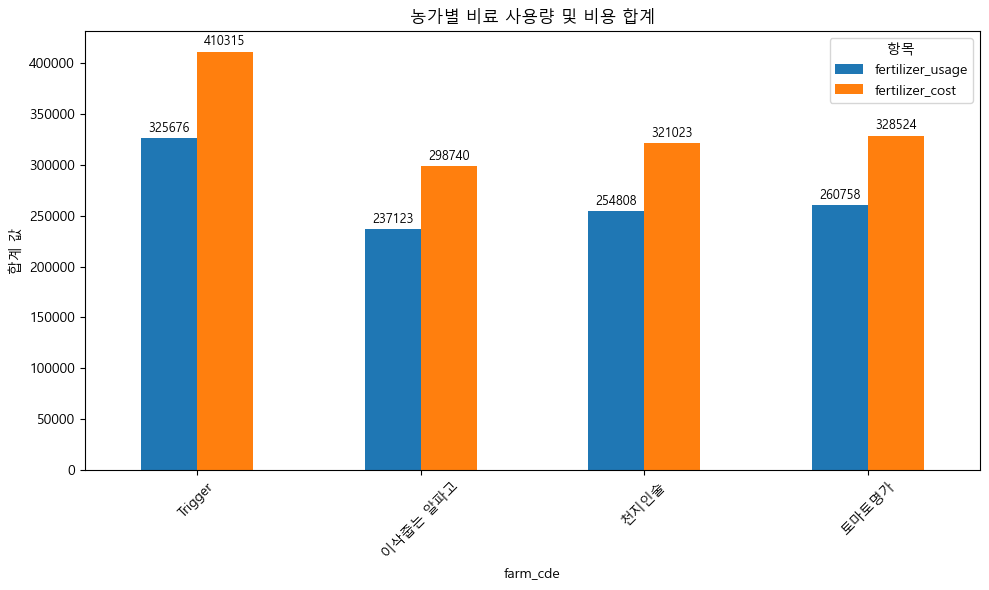

In [ ]:
# farm_cde별 fertilizer_usage, fertilizer_cost 합계 계산
df_2 = df_energy.groupby("farm_cde")[["fertilizer_usage", "fertilizer_cost"]].sum()

print(df_2)

# 막대 그래프 그리기
ax = df_2.plot(kind="bar", figsize=(10,6))
plt.title("농가별 비료 사용량 및 비용 합계")
plt.xlabel("farm_cde")
plt.ylabel("합계 값")
plt.xticks(rotation=45)
plt.legend(title="항목")
plt.tight_layout()

# 각 막대 위에 수치 표시
for p in ax.patches:
    value = int(p.get_height())  # 막대 높이(값)
    x = p.get_x() + p.get_width() / 2  # 막대 중앙
    y = p.get_height()                 # 막대 높이
    ax.text(x, y + (y*0.01), str(value), ha="center", va="bottom", fontsize=9)

plt.show()

          heating_energy_usage  heating_energy_cost
farm_cde                                           
Trigger                4015514               220825
이삭줍는 알파고               3501060               192525
천지인술                   3050602               167756
토마토명가                  2413664               132720


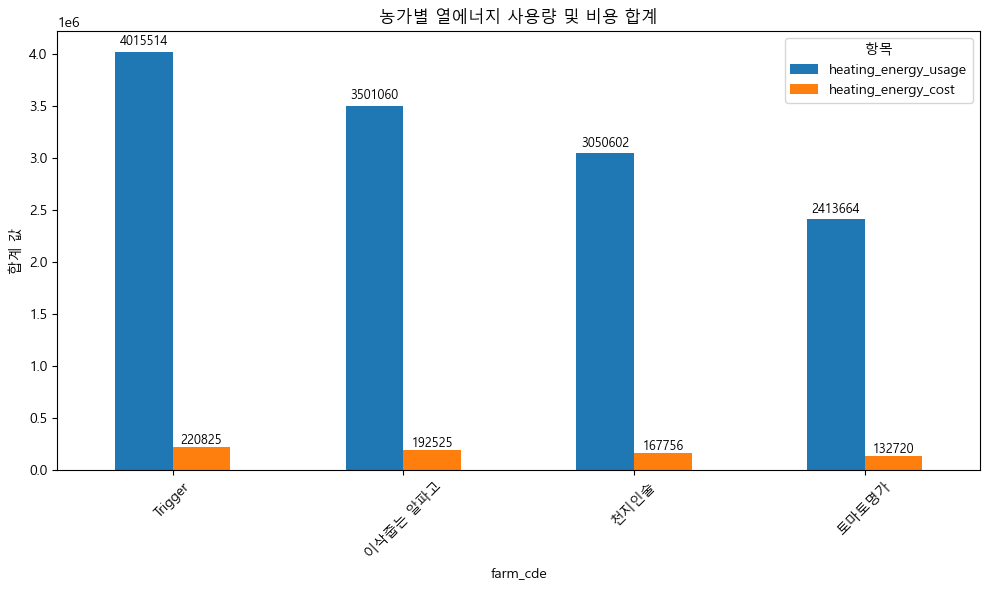

In [23]:
# farm_cde별 heating_energy_usage, heating_energy_cost 합계 계산
df_3 = df_energy.groupby("farm_cde")[["heating_energy_usage", "heating_energy_cost"]].sum()

print(df_3)

# 막대 그래프 그리기
ax = df_3.plot(kind="bar", figsize=(10,6))
plt.title("농가별 열에너지 사용량 및 비용 합계")
plt.xlabel("farm_cde")
plt.ylabel("합계 값")
plt.xticks(rotation=45)
plt.legend(title="항목")
plt.tight_layout()

# 각 막대 위에 수치 표시
for p in ax.patches:
    value = int(p.get_height())  # 막대 높이(값)
    x = p.get_x() + p.get_width() / 2  # 막대 중앙
    y = p.get_height()                 # 막대 높이
    ax.text(x, y + (y*0.01), str(value), ha="center", va="bottom", fontsize=9)

plt.show()

          CO2_usage  CO2_cost
farm_cde                     
Trigger        1325       776
이삭줍는 알파고      14750      8694
천지인술              0         0
토마토명가         21100     12447


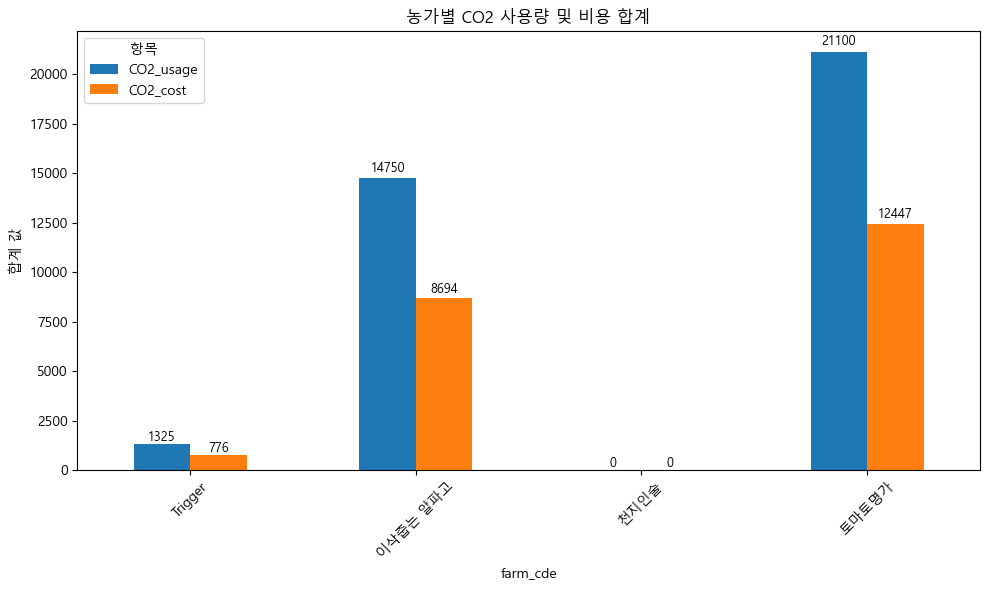

In [24]:
# farm_cde별 CO2_usage, CO2_cost 합계 계산
df_4 = df_energy.groupby("farm_cde")[["CO2_usage", "CO2_cost"]].sum()

print(df_4)

# 막대 그래프 그리기
ax = df_4.plot(kind="bar", figsize=(10,6))
plt.title("농가별 CO2 사용량 및 비용 합계")
plt.xlabel("farm_cde")
plt.ylabel("합계 값")
plt.xticks(rotation=45)
plt.legend(title="항목")
plt.tight_layout()

# 각 막대 위에 수치 표시
for p in ax.patches:
    value = int(p.get_height())  # 막대 높이(값)
    x = p.get_x() + p.get_width() / 2  # 막대 중앙
    y = p.get_height()                 # 막대 높이
    ax.text(x, y + (y*0.01), str(value), ha="center", va="bottom", fontsize=9)

plt.show()

천지인술과 Trigger에서 co2 사용량이 압도적으로 작다!!!!!!

          mist_usage_time  mist_cost
farm_cde                            
Trigger              2885      33676
이삭줍는 알파고            22221     259511
천지인술                 2553      29799
토마토명가                2029      23678


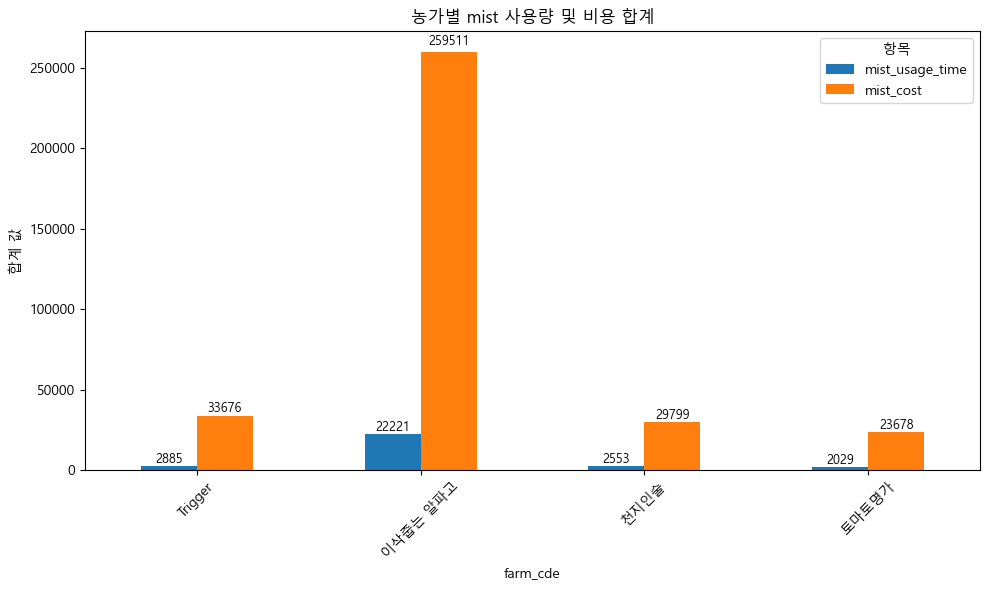

In [26]:
# farm_cde별 mist_usage_time, mist_cost 합계 계산
df_5 = df_energy.groupby("farm_cde")[["mist_usage_time", "mist_cost"]].sum()

print(df_5)

# 막대 그래프 그리기
ax = df_5.plot(kind="bar", figsize=(10,6))
plt.title("농가별 mist 사용량 및 비용 합계")
plt.xlabel("farm_cde")
plt.ylabel("합계 값")
plt.xticks(rotation=45)
plt.legend(title="항목")
plt.tight_layout()

# 각 막대 위에 수치 표시
for p in ax.patches:
    value = int(p.get_height())  # 막대 높이(값)
    x = p.get_x() + p.get_width() / 2  # 막대 중앙
    y = p.get_height()                 # 막대 높이
    ax.text(x, y + (y*0.01), str(value), ha="center", va="bottom", fontsize=9)

plt.show()

'이삭줍는 알파고'가 mist 사용 비용이 압도적으로 많다.

# 일자별 사용비용

In [ ]:
print(df["measDate"].dtype)

object


In [28]:
df["measDate"] = pd.to_datetime(df["measDate"])


In [29]:
min_date = df["measDate"].min()
max_date = df["measDate"].max()

print("최소 날짜:", min_date)
print("최대 날짜:", max_date)


최소 날짜: 2022-10-01 00:00:00
최대 날짜: 2022-12-09 00:00:00


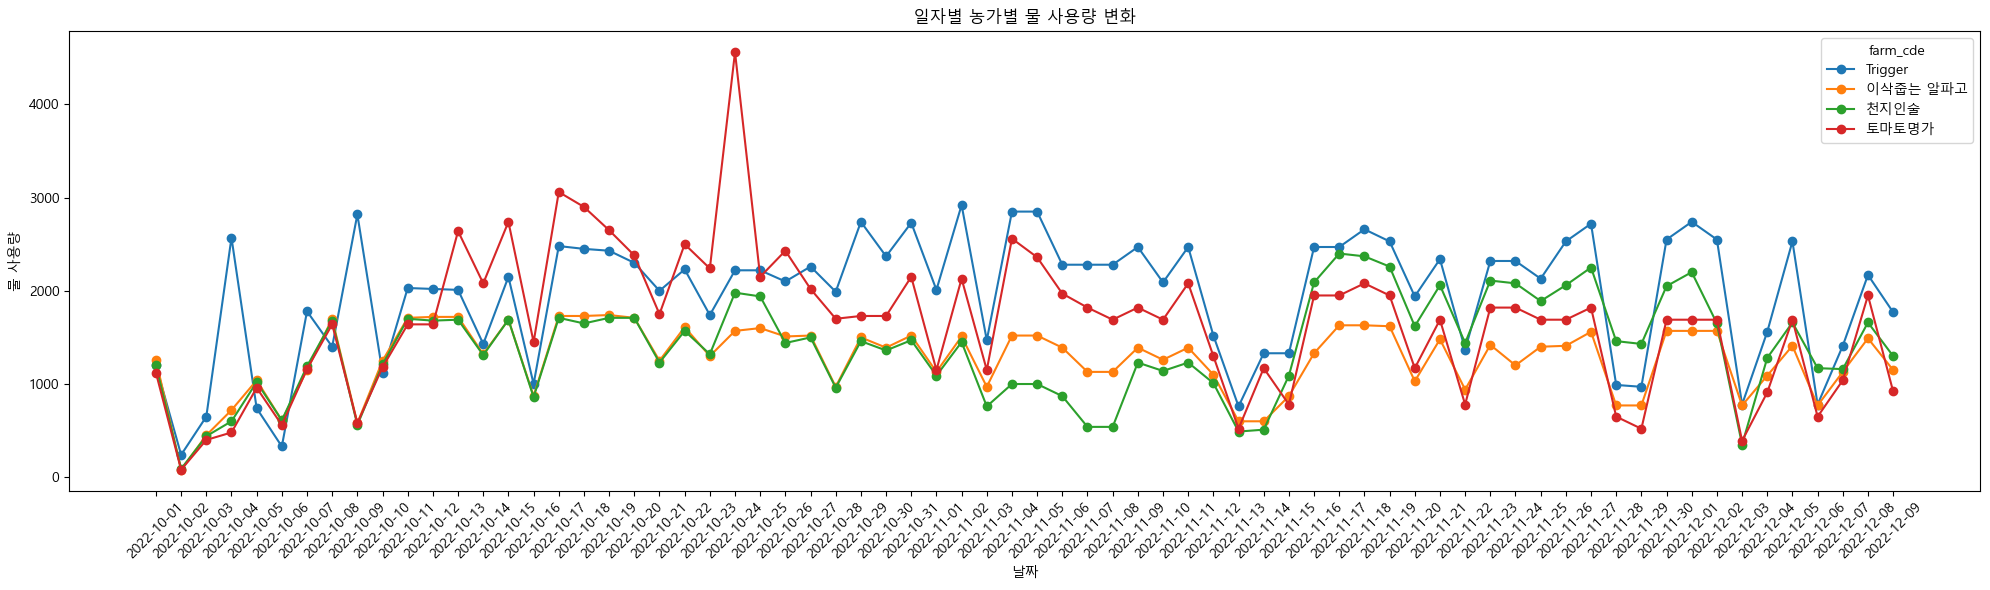

In [32]:
# farm_cde, measDate별 water_usage 합계 계산
df_daily = df_energy.groupby(["measDate", "farm_cde"])["water_usage"].sum().reset_index()

# 선그래프 그리기
plt.figure(figsize=(20,6))

for farm in df_daily["farm_cde"].unique():
    farm_data = df_daily[df_daily["farm_cde"] == farm]
    plt.plot(farm_data["measDate"], farm_data["water_usage"], marker="o", label=farm)

plt.title("일자별 농가별 물 사용량 변화")
plt.xlabel("날짜")
plt.ylabel("물 사용량")
plt.legend(title="farm_cde")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


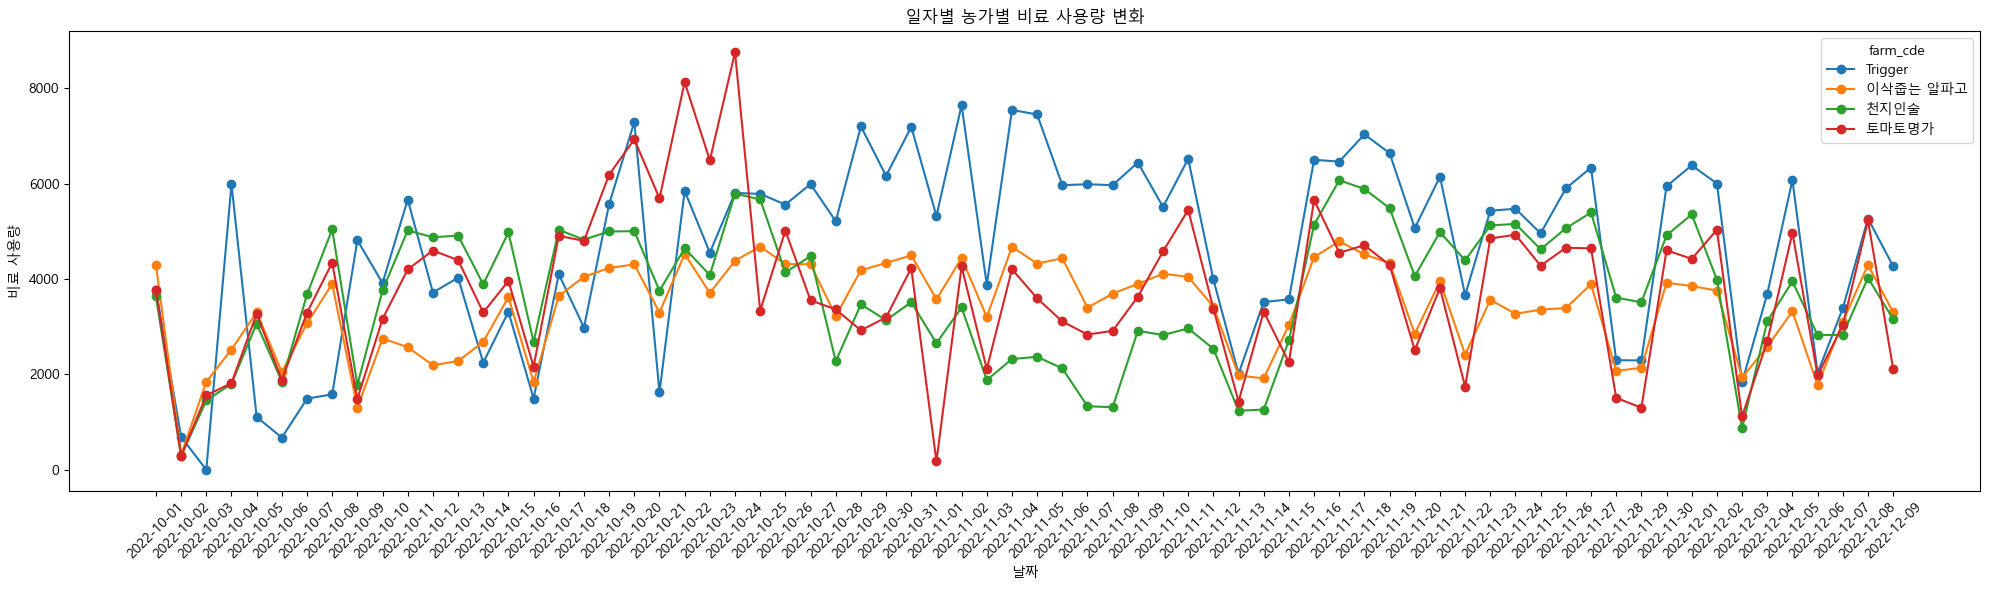

In [40]:
# farm_cde, measDate별 fertilizer_usage 합계 계산
df_daily = df_energy.groupby(["measDate", "farm_cde"])["fertilizer_usage"].sum().reset_index()

# 선그래프 그리기
plt.figure(figsize=(20,6))

for farm in df_daily["farm_cde"].unique():
    farm_data = df_daily[df_daily["farm_cde"] == farm]
    plt.plot(farm_data["measDate"], farm_data["fertilizer_usage"], marker="o", label=farm)

plt.title("일자별 농가별 비료 사용량 변화")
plt.xlabel("날짜")
plt.ylabel("비료 사용량")
plt.legend(title="farm_cde")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

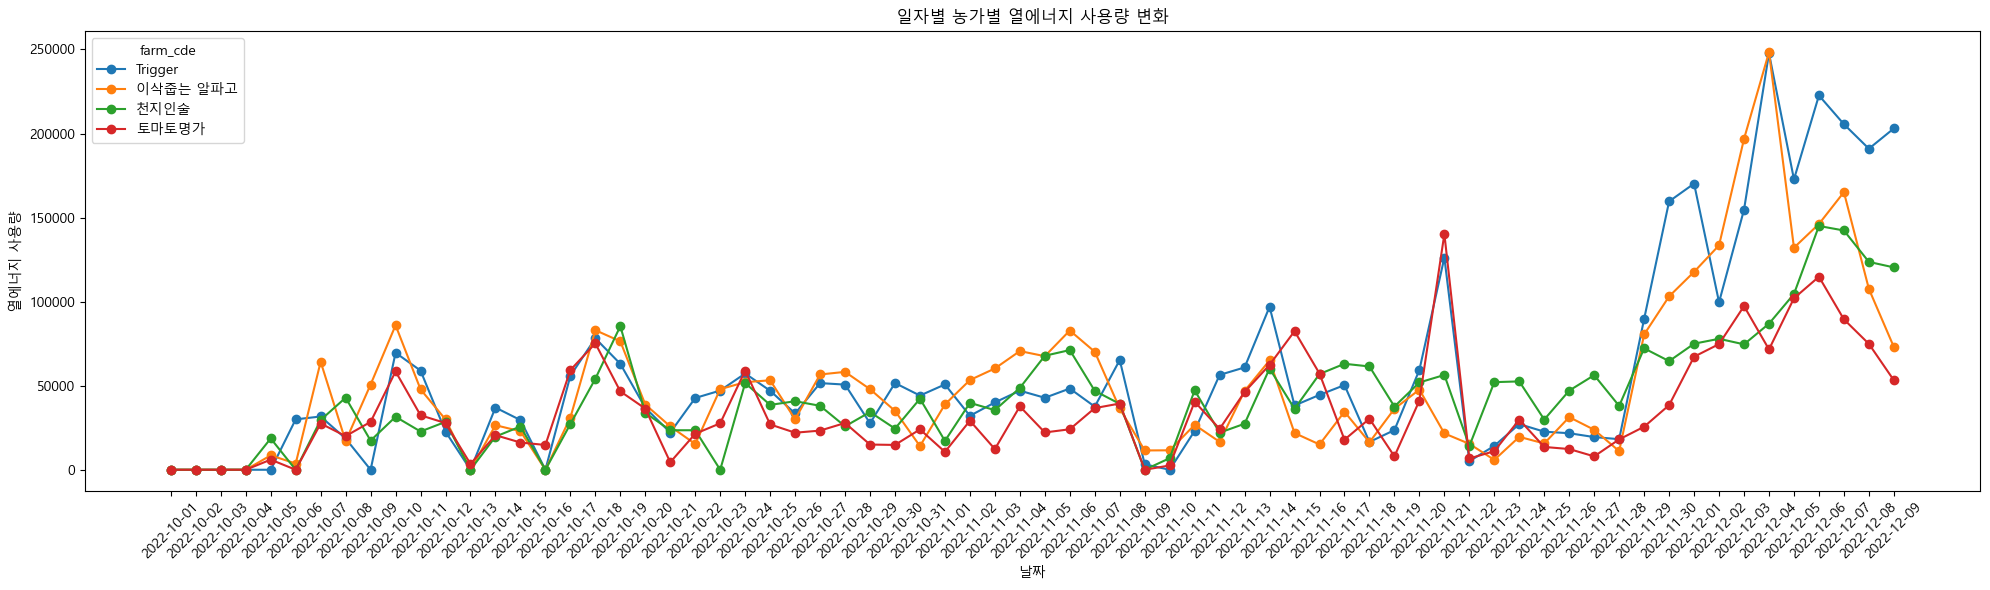

In [39]:
# farm_cde, measDate별 heating_energy_usage 합계 계산
df_daily = df_energy.groupby(["measDate", "farm_cde"])["heating_energy_usage"].sum().reset_index()

# 선그래프 그리기
plt.figure(figsize=(20,6))

for farm in df_daily["farm_cde"].unique():
    farm_data = df_daily[df_daily["farm_cde"] == farm]
    plt.plot(farm_data["measDate"], farm_data["heating_energy_usage"], marker="o", label=farm)

plt.title("일자별 농가별 열에너지 사용량 변화")
plt.xlabel("날짜")
plt.ylabel("열에너지 사용량")
plt.legend(title="farm_cde")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

11월 28일 이후로 대부분 농가의 열에너지 사용량이 급등! 특히 '이삭줍는 알파고', 'Trigger', '천지인술'

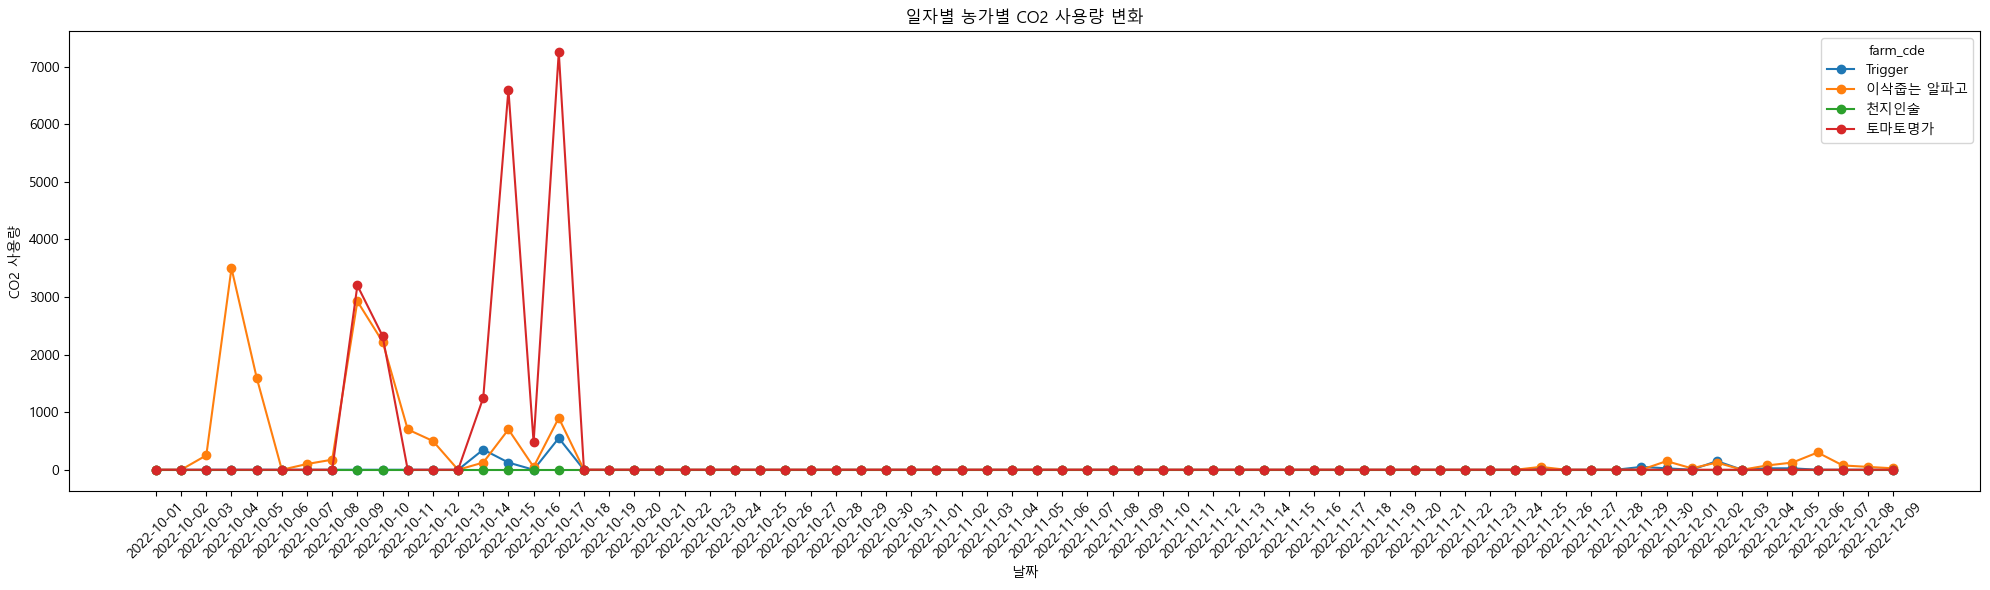

In [38]:
# farm_cde, measDate별 CO2_usage 합계 계산
df_daily = df_energy.groupby(["measDate", "farm_cde"])["CO2_usage"].sum().reset_index()

# 선그래프 그리기
plt.figure(figsize=(20,6))

for farm in df_daily["farm_cde"].unique():
    farm_data = df_daily[df_daily["farm_cde"] == farm]
    plt.plot(farm_data["measDate"], farm_data["CO2_usage"], marker="o", label=farm)

plt.title("일자별 농가별 CO2 사용량 변화")
plt.xlabel("날짜")
plt.ylabel("CO2 사용량")
plt.legend(title="farm_cde")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2022-10-13부터 16일까지 토마토 명가의 co2사용량이 갑자기 증가 후 다시 잠잠

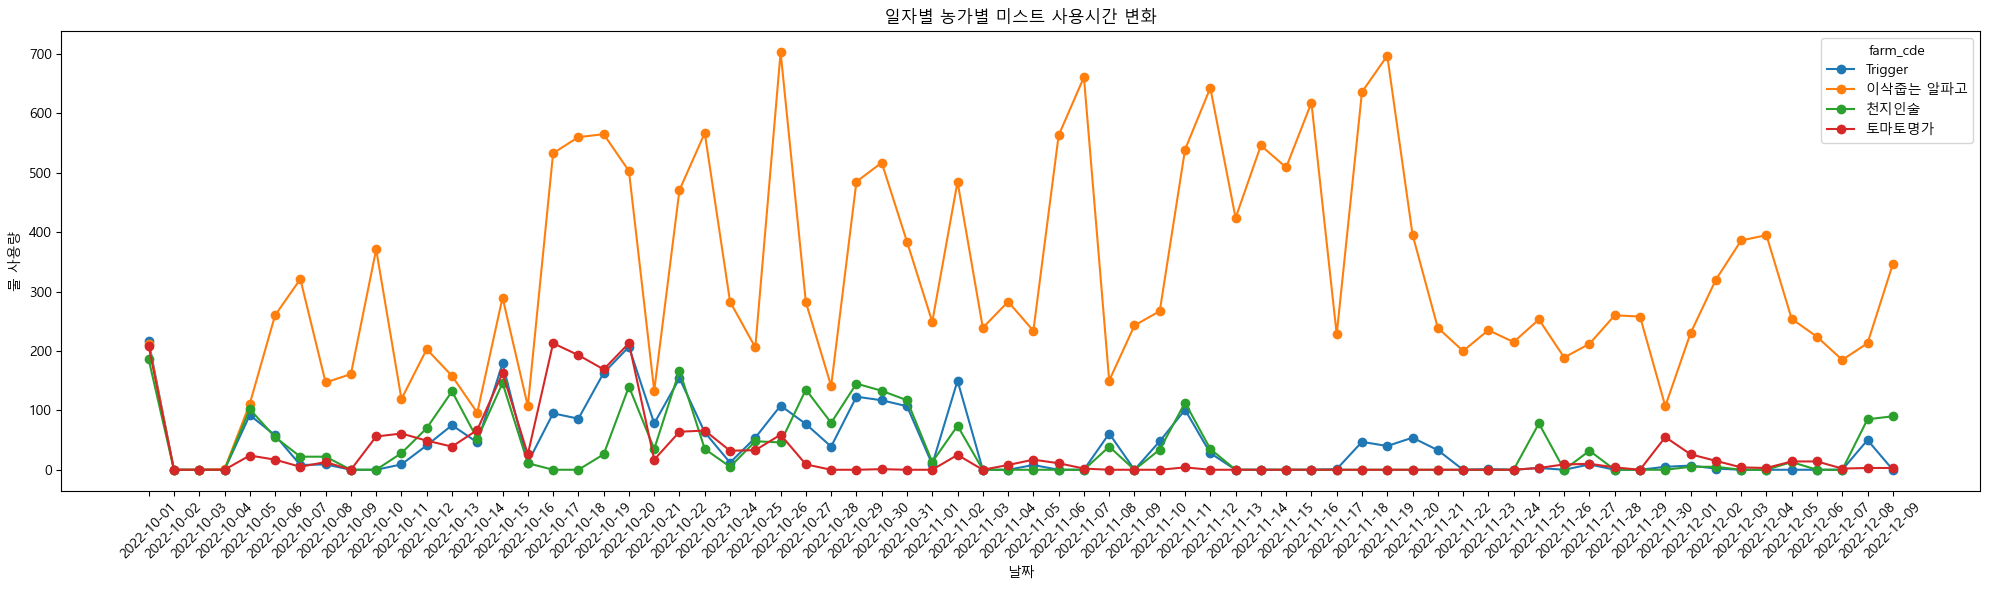

In [37]:
# farm_cde, measDate별 mist_usage_time 합계 계산
df_daily = df_energy.groupby(["measDate", "farm_cde"])["mist_usage_time"].sum().reset_index()

# 선그래프 그리기
plt.figure(figsize=(20,6))

for farm in df_daily["farm_cde"].unique():
    farm_data = df_daily[df_daily["farm_cde"] == farm]
    plt.plot(farm_data["measDate"], farm_data["mist_usage_time"], marker="o", label=farm)

plt.title("일자별 농가별 미스트 사용시간 변화")
plt.xlabel("날짜")
plt.ylabel("물 사용량")
plt.legend(title="farm_cde")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

이삭줍는 알파고 제외한 나머지 농가는 2022-11-01까지 미스트를 사용했고 이삭줍는 알파고는 10월초부터 11월 중순까지 미스트를 많이 사용했다.